In [1]:
#--------------------------------------

# ABIDAR Bouchra && LIEPCHITZ Laura
# MLDS 2019/2020

#--------------------------------------

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from keras import backend as K
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Lambda
from keras.layers import BatchNormalization, Activation
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [4]:
from package_sgan import *

In [5]:
sgan = SGAN(10000,64)

In [6]:
# Train the SGAN 
iteration_checkpoints, d_losses,d_accuracies = sgan.train()

n_epochs=10000, n_batch=64, 1/2=32


### Plot Discriminator supervised loss 

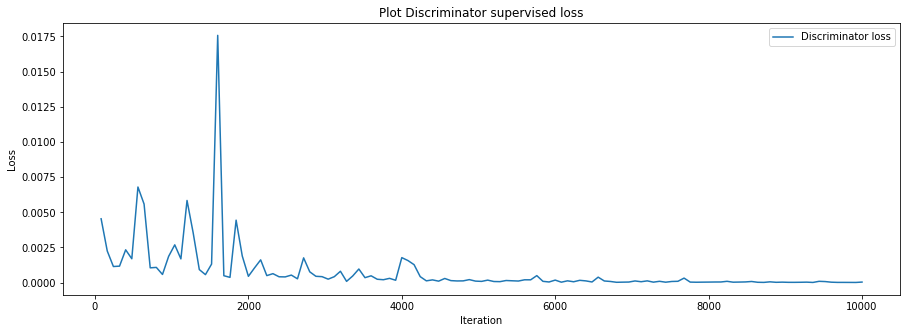

In [7]:
losses = np.array(d_losses)
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses, label="Discriminator loss")
plt.title("Plot Discriminator supervised loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

In [12]:
from keras.models import load_model
test_model = load_model("models/dcgan_discriminator_weight_10000.h5")
test_loss, test_acc = test_model.evaluate(x, y)
test_acc

10000/10000 [==============================] - 1s 89us/step


0.9187999963760376